<a href="https://colab.research.google.com/github/Max-FM/IAA-Social-Distancing/blob/master/FFT_FakeRoads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Fourier Transforms on Fake Roads

###Download Files

In [1]:
!git clone https://github.com/Max-FM/IAA-Social-Distancing.git

%cd /content/IAA-Social-Distancing/Fourier Analysis/

Cloning into 'IAA-Social-Distancing'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.
/content/IAA-Social-Distancing/Fourier Analysis


###Import Packages

In [2]:
%matplotlib inline

import numpy as np

from skimage.io import imread
from skimage.color import rgb2grey

from scipy.fft import fft2, fftshift, ifft2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

###Read and Preprocess Image Files

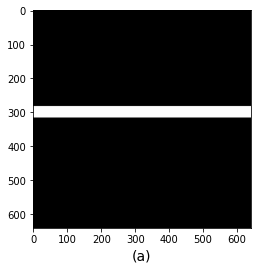

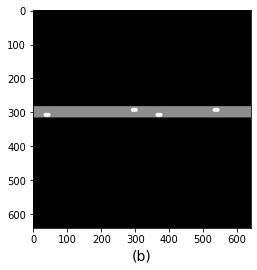

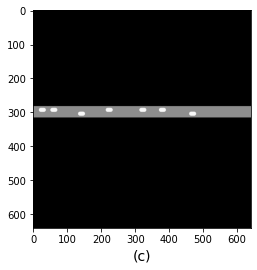

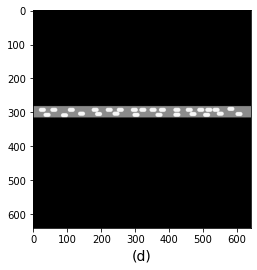

In [3]:
pathList = [f'Fake Roads/Road_{cars}_TransparentBack.jpg' for cars in ['NoCars', 'FewCars', 'SomeCars', 'ManyCars']]

roadList_rgb = [imread(path) for path in pathList]

# Convert to greyscale.
roadList = [rgb2grey(road) for road in roadList_rgb] 

labels=['(a)', '(b)', '(c)', '(d)']
for i, road in enumerate(roadList):
    plt.figure()
    plt.imshow(road, cmap='Greys')
    plt.xlabel(labels[i], fontsize=14)

###Perform Fast Fourier Transforms

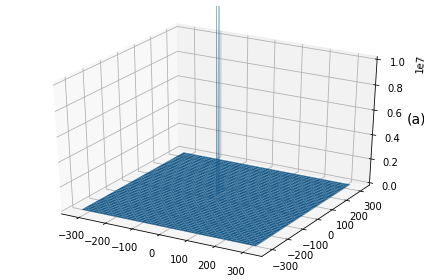

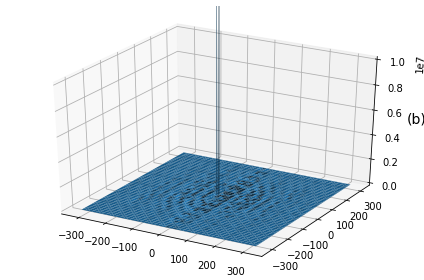

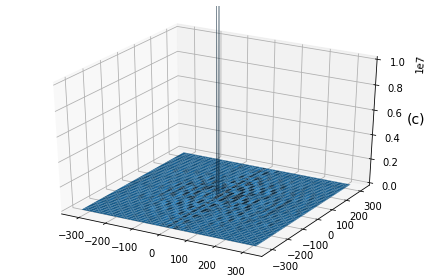

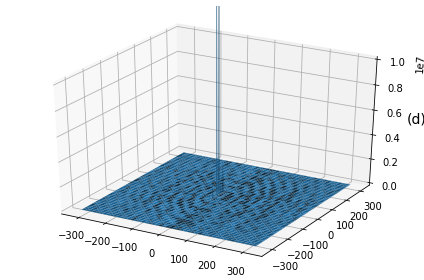

In [4]:
#Performs FFT and shifts zero frequency to center of image.
roadFFTList = [fftshift(fft2(road)) for road in roadList] 

#Calculates power spectrum.
roadPSList = [abs(roadFFT)**2 for roadFFT in roadFFTList]

#Create pixel grid.
x, y = np.arange(0,640), np.arange(0,640)
x, y = x - np.median(x), y - np.median(y)
X, Y = np.meshgrid(x,y)

#Plot power spectrum.
for i, roadPS in enumerate(roadPSList):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot_surface(X, Y, roadPS);
    ax.set_zlim(0, 1e7)
    ax.set_zlabel(labels[i], fontsize=14)
    plt.tight_layout()





###Create Pixel Mask in Fourier Space

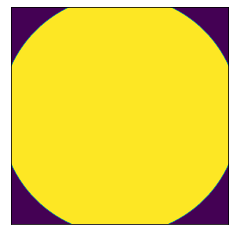

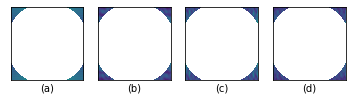

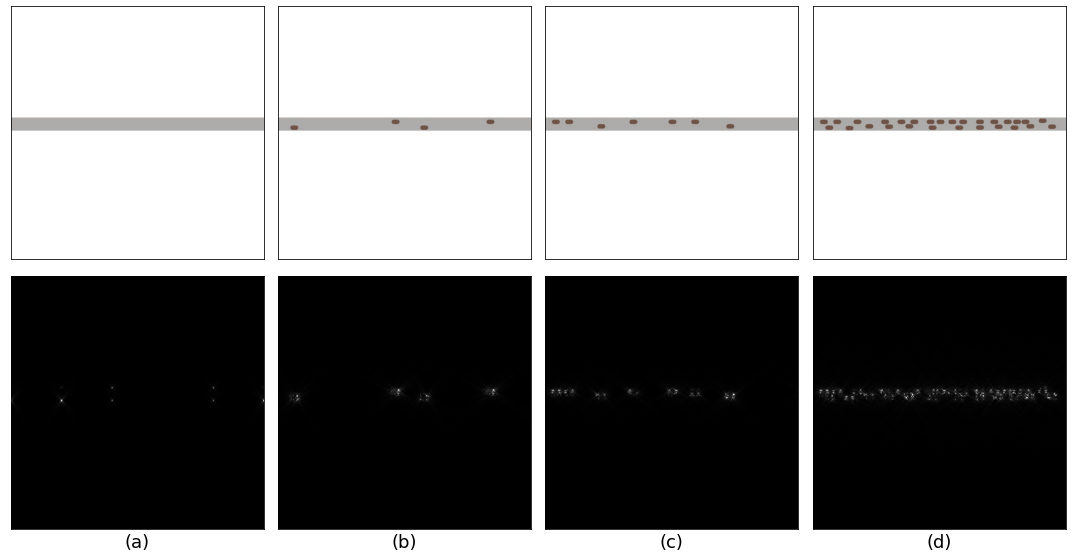

In [5]:
# Create pixel mask.
R =  350
mask = X**2 + Y**2 < R**2

# Apply pixel mask in Fourier space.
roadFFTMaskList = [np.ma.array(roadFFT, mask=mask) for roadFFT in roadFFTList]
roadMaskList = [ifft2(roadFFTMask.filled(0)) for roadFFTMask in roadFFTMaskList]

#Plot pixel mask
plt.figure()
plt.imshow(mask)
plt.xticks([])
plt.yticks([])

#Plot masked frequencies in Fourier space.
fig, ax = plt.subplots(ncols=len(roadList))
for i in range(len(roadList)):
    ax[i].imshow(abs(roadFFTMaskList[i]))
    ax[i].set_yticks([])
    ax[i].set_xticks([])
    ax[i].set_xlabel(labels[i])

#Plot fake roads before and after masking in Fourier space.
fig, ax = plt.subplots(nrows=2, ncols=len(roadList), figsize=(15,8))
for i in range(len(roadMaskList)):
    ax[0, i].imshow(roadList_rgb[i], cmap='Greys')
    ax[1, i].imshow(abs(roadMaskList[i]), cmap='Greys_r')
    
    ax[0, i].set_yticks([])
    ax[0, i].set_xticks([])
    ax[1, i].set_yticks([])
    ax[1, i].set_xticks([])

    ax[1, i].set_xlabel(labels[i], fontsize=18)

plt.tight_layout()
plt.savefig('/content/fftFakeRoads.jpg', dpi=200, bbox_inches='tight')
    